
#### Summary

In this example you will see how to extract Great Lakes average water surface temperature data from the ERDDAP server and make a plot of the longterm average water surface temperatue.

#### The example demonstrates the following techniques:

* Loading Great Lakes average water surface temperature data from Great Lakes ERDDAP data server.
* Ploting the chart to show the highest and lowest temperature for the specific day.
* Ploting the chart using the datetime class as the X axis.
* Ploting the chart to show temperature in both degree C and F.

#### Datesets used:

* Great Lakes Surface Environmental Analysis (GLSEA): a lakewide average water surface temperauture product.
* We are using the new developed: ACSPO GLSEA or GLSEA3. ACSPO means Advanced Clear-sky Processor for Oceans.
* The data files cover from 2007 to current year.

#### Import the required Python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from PIL import Image
import math as m
from datetime import datetime
import matplotlib.dates as mdates




#### Define some function that we need :

function get_366_arry(): Checks to make sure the input array size is 366

In [2]:
def get_366_arry(t_arry):

    if (t_arry.size < 366):
        t_arry = np.append(t_arry, np.NAN)

    return t_arry

function get_days_arr() takes a year (integer) and reture a list of datetime stamp.

In [3]:
def get_days_arr(c_yr):

    d = range(1,367)  # range from 1 to 366

    d_list = []

    for i in d:

        d_str = str(c_yr) + ' ' + str(i)
     
        d2 = datetime.strptime(d_str, '%Y %j')
        d_list.append(d2)
    
    d_arr = np.array(d_list)
    #print(d_arr)
    return d_arr    

function draw_plot() takes data array, lake, year Jilian day and years list as input to draw the plat

In [4]:
def draw_plot(t_all_arry, lake, c_yr, jd,  year_list):
    
    begin_day_str = str(c_yr) + '-01-01'  # '2021-01-01'
    end_day_str = str(c_yr) + '-12-31'    # '2021-12-31'
    
    date_marker = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in pd.date_range( begin_day_str, end_day_str, freq="ME")]
    print(date_marker)
    
    days_arr = get_days_arr(c_yr) 
    
    fig= plt.figure(figsize=(11, 8))

    ax = fig.add_subplot(111)

    number_of_plots = len(year_list) + 1  

    for i, yr4 in enumerate(year_list):
        ax.plot(days_arr, t_all_arry[i], color='blue', alpha=.1)

    min_v_index_tp = np.where( t_all_arry[:-1,jd] == np.amin(t_all_arry[:-1,jd]))
    min_v_index = min_v_index_tp[0][0]
    print(min_v_index)
    ax.plot(days_arr, t_all_arry[min_v_index], color='green', label=str(year_list[min_v_index]) )

 
    max_v_index_tp = np.where( t_all_arry[:-1,jd] == np.amax(t_all_arry[:-1,jd]))

    max_v_index = max_v_index_tp[0][0]
    
    ax.plot(days_arr, t_all_arry[max_v_index], color='red', label=str(year_list[max_v_index]) )

    ax.plot(days_arr, t_all_arry[-1], color='#eb7434', label=str(c_yr) )

    nan_arr = np.empty(366)
    nan_arr.fill(np.NAN)
    ax.plot(days_arr, nan_arr, color='blue', alpha=.3, label='Other years' )

    avg_arry = np.nanmean(t_all_arry[:-1], axis=0)
    
    ax.plot(days_arr, avg_arry, color='#525150',  label='Average (' + str(year_list[0]) + '-' + str(year_list[-1]) +')' )

    ax.set_ybound(lower=0, upper=30)
    ax.set_xbound(lower=0, upper=366)

    ax.set_xlim(days_arr[0], days_arr[-1])

    ax.set_xticks(date_marker )
    dtFmt = mdates.DateFormatter('%b-%d') # define the formatting

    ax.xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis

    ax.set_yticks(range(0,30,2))
 
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}\u00b0C'.format))  # show degree C char

    ax.set_ylabel('Water Surface Temperature', weight='semibold', fontsize=12)
    ax.set_xlabel('Months of Year',  weight='semibold', fontsize=12)
    ax2 = ax.twinx()
    ax2.set_yticks(range(32,86,4))

    ax2.set_ylim(32, 86)

    ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}\u00b0F'.format))  # show degree F char
 
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    ax.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

    fig.suptitle('Lake '  + lake + ' Average GLSEA Surface Water Temperature (' + str(year_list[0]) + ' - ' + str(c_yr) +')', weight='semibold', fontsize=12, ha='center')

    ax.legend(title='YEARS', loc='upper left', ncol=2, fancybox=True)

    plt.figtext(0.1, 0.02, 'NOAA CoastWatch Great Lakes Node', family='sans-serif', style='italic', weight='semibold', size='medium' )

    plt.figtext(0.7, 0.02, datetime.now().strftime("%B %d, %Y %H:%M:%S"), family='sans-serif', style='italic', weight='semibold', size='medium' )

    day = datetime.strptime('{} {}'.format(jd, c_year),'%j %Y')
    print(day.strftime('%Y %B %d'))

    year_str = '(' + str(year_list[0]) + '-' + str(year_list[-1]) +')'

    plt.figtext(0.20, 0.92, 'The warmest year on ' + day.strftime('%B %d') + ' for the period of record ' + year_str + ' was in ' + str(year_list[max_v_index]) + ' (shown in red)', color='black', fontsize=10 )

    plt.figtext(0.20, 0.90, 'The coldest year on ' + day.strftime('%B %d') + ' for the period of record ' +  year_str + ' was in ' + str(year_list[min_v_index]) + ' (shown in green)', color='black', fontsize=10 )
 
    plt.show()


#### Define current year and past years range
Get the current year as an integer number and define a longterm time ranage. In this example, the current year is 2024 and longterm range is 2007 - 2023.

In [5]:
c_year = int(datetime.now().strftime("%Y"))
 
print(c_year)

b_year = 2007

year_list = []
for i in range(b_year, c_year):
    year_list.append(i)

print(year_list)

today = datetime.now()
jd = (today - datetime(today.year, 1, 1)).days 

2024
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


#### Get current year's temperature data from ERDDAP
The dataset ID is glsea_avgtemps_3 in the ERDDAP server. The file name of the current year is glsea-temps_1024_3.dat. The file contains 9 lines header information, so we need to skip the first 9 lines when reading the data file. The data in the file are organized in 8 columns, such as Year, Julian day, Lake Superior, Lake Michigan, Lake Huron, Lake Erie, Lake Ontario, and Lake st clr. The file include the average temperature from current day back to 365 days.

eg.

Get data from ERDDAP server:

In [6]:
c_fn = 'https://apps.glerl.noaa.gov/erddap/files/glsea_avgtemps_3/glsea-temps_1024_3.dat'
c_df = pd.read_csv(c_fn, skiprows=9,delimiter=r'\s+', header=None, names=['YEAR', 'JD', 'S', 'M', 'H', 'E', 'O','St'], dtype=np.float64)

print(c_df.head())
print(c_df.info())
    
c_yr_list = c_df['YEAR']
 
begin_c_yr_index = list(c_yr_list).index(float(c_year))  # find the index of the current year (2024)
print('index of begin current year : ', begin_c_yr_index)



     YEAR     JD     S     M     H      E     O     St
0  2023.0  127.0  2.24  4.64  4.14   8.87  7.02   9.59
1  2023.0  128.0  2.26  4.81  4.23   9.51  7.33  10.13
2  2023.0  129.0  2.30  4.98  4.37   9.97  7.58  10.81
3  2023.0  130.0  2.27  5.17  4.50  10.29  7.68  10.95
4  2023.0  131.0  2.38  5.39  4.64  10.71  7.80  11.01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    365 non-null    float64
 1   JD      365 non-null    float64
 2   S       365 non-null    float64
 3   M       365 non-null    float64
 4   H       365 non-null    float64
 5   E       365 non-null    float64
 6   O       365 non-null    float64
 7   St      365 non-null    float64
dtypes: float64(8)
memory usage: 22.9 KB
None
index of begin current year :  239


Get a sub datafreme of Lake Michigan for current year:

In [7]:
c_df_sub = c_df[begin_c_yr_index:]  # get a sub dataframe that only contains data for 2024
 

cur_m_arry = c_df_sub['M'].values   # get a sub dataframe that only contains data for Lake Michigan

for i in range(begin_c_yr_index+1):
    cur_m_arry = np.append(cur_m_arry, np.NAN)

print(cur_m_arry)



[5.63 5.51 5.47 5.43 5.4  5.35 5.32 5.27 5.16 4.71 4.37 4.26 4.1  3.97
 3.82 3.69 3.62 3.55 3.29 3.24 3.26 3.25 3.37 3.39 3.4  3.47 3.49 3.56
 3.56 3.61 3.62 3.63 3.65 3.62 3.62 3.6  3.54 3.49 3.48 3.49 3.51 3.47
 3.47 3.44 3.38 3.33 3.28 3.23 3.24 3.22 3.34 3.38 3.32 3.31 3.18 3.17
 3.22 3.31 3.31 3.29 3.41 3.5  3.51 3.54 3.63 3.69 3.66 3.7  3.64 3.64
 3.65 3.67 3.73 3.77 3.8  3.79 3.74 3.64 3.53 3.47 3.42 3.42 3.46 3.42
 3.53 3.57 3.54 3.51 3.5  3.55 3.6  3.65 3.74 3.9  3.99 4.04 4.1  4.16
 4.23 4.31 4.38 4.51 4.68 4.82 4.99 5.09 5.1  5.07 5.05 5.1  5.08 5.1
 5.14 5.25 5.37 5.49 5.56 5.64 5.67 5.76 5.89 6.   6.14 6.48 6.75 6.94
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  

#### Get data from 2007 to 2023
Each year have one data file. The file naming convention is glsea-tempsYYYY_1024_3.dat. 

eg. glsea-temps2023_1024.dat. 

The file format is samilar as the current year's data file.

first, define an array of (18,366) to hold all data

In [8]:
m_all_arry = np.zeros( (len(year_list)+1,366), dtype=float)   
print(m_all_arry.shape)

(18, 366)


Second, get the data from the 2007  to 2023 and put all the data in variable m_all_arry

In [9]:

for i, yr4 in enumerate(year_list):
    fn = 'https://apps.glerl.noaa.gov/erddap/files/glsea_avgtemps_3/' + str(yr4) + '/glsea-temps' + str(yr4) + '_1024_3.dat'
    #print(fn)
    df = pd.read_csv(fn, skiprows=9,delimiter=r'\s+', header=None, names=['YEAR', 'JD', 'S', 'M', 'H', 'E', 'O','St'], dtype=np.float64)

    m_arry = df['M'].values            # get data for Lake Michigan

    #print(s_arry.size)
    print(yr4)
    m_all_arry[i] = get_366_arry(m_arry)   

#print(s_all_arry)

m_all_arry[-1] = cur_m_arry   # last row is current year sst               
 


2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


Third, call the function (defined before) to draw the plot.

[datetime.date(2024, 1, 31), datetime.date(2024, 2, 29), datetime.date(2024, 3, 31), datetime.date(2024, 4, 30), datetime.date(2024, 5, 31), datetime.date(2024, 6, 30), datetime.date(2024, 7, 31), datetime.date(2024, 8, 31), datetime.date(2024, 9, 30), datetime.date(2024, 10, 31), datetime.date(2024, 11, 30), datetime.date(2024, 12, 31)]
7
2024 May 05


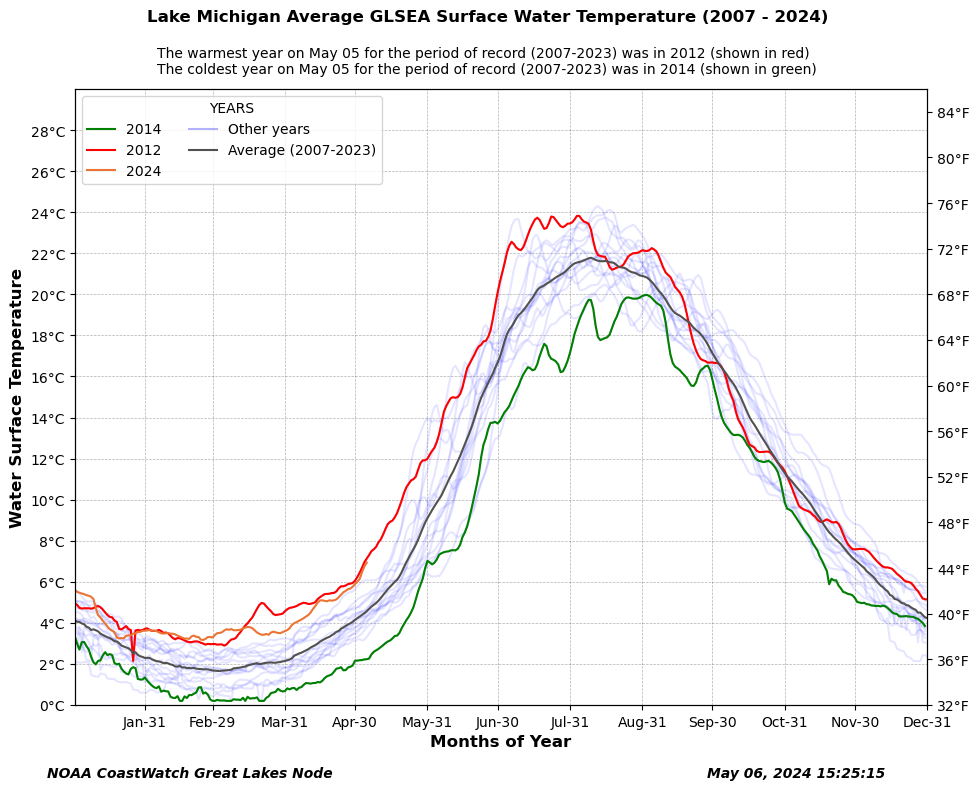

In [10]:
draw_plot(m_all_arry, 'Michigan',  c_year, jd, year_list)